# Transformer-based deep learning models for the sentiment analysis of social media data

- The model implemented is derived from the above reserach paper

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np


import re
import nltk
from nltk.stem import WordNetLemmatizer


from transformers import AutoTokenizer, AutoModel
from torch.nn import functional as F
from transformers import BertTokenizer, BertModel

import matplotlib.pyplot as plt


## Importing and Viewing first 5 of the Dataset

In [3]:
df = pd.read_csv('archive (1) 2/analyst_ratings_processed.csv')
df = df[['stock', 'title']].copy()

In [4]:
df.head(2)

,stock,title
0,A,Stocks That Hit 52-Week Highs On Friday
1,A,Stocks That Hit 52-Week Highs On Wednesday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   stock   1397891 non-null  object
 1   title   1400469 non-null  object
dtypes: object(2)
memory usage: 21.4+ MB


## Droping Duplicates in the review column

In [6]:
df = df.drop_duplicates(subset='title')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843225 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   843225 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Dropping Empty rows in DataFrame

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Converting all reviews to Lower Case

In [10]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [12]:
df.head(1)

,stock,title
0,a,stocks that hit 52-week highs on friday


## Removing \n tags

In [13]:
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [14]:
df.head(2)

,stock,title
0,a,stocks that hit 52-week highs on friday
1,a,stocks that hit 52-week highs on wednesday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


## Removing HTML Tags

In [16]:
regex = re.compile(r'<[^>]+>')
def remove_html(string):
    return regex.sub('', string)
df['title']=df['title'].apply(lambda cw : remove_html(cw))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [18]:
df.head(1)

,stock,title
0,a,stocks that hit 52-week highs on friday


## Removing Special Characters

In [19]:
def remove_sc(string):
    return re.sub(r"[^a-zA-Z0-9 ]", "", string)

df['title']=df['title'].apply(lambda cw : remove_sc(cw))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841148 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   841148 non-null  object
 1   title   841148 non-null  object
dtypes: object(2)
memory usage: 19.3+ MB


In [21]:
df.head(1)

,stock,title
0,a,stocks that hit 52week highs on friday


In [22]:
df['title'].describe()

count                       841148
unique                      839948
top       premarket news and views
freq                             4
Name: title, dtype: object

## Once more removing Duplicates

In [23]:
df = df.drop_duplicates(subset = "title")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839948 entries, 0 to 1400468
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   stock   839948 non-null  object
 1   title   839948 non-null  object
dtypes: object(2)
memory usage: 19.2+ MB


## Lemmatization of reviews

In [78]:
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

df['title']=df['title'].apply(lambda cw : lemmatize(cw))

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stock   4629 non-null   object
 1   title   4629 non-null   object
dtypes: object(2)
memory usage: 108.5+ KB


In [80]:
df.head(1)

,stock,title
0,a,stock that hit 52week high on friday


## Exploratory Data Analysis

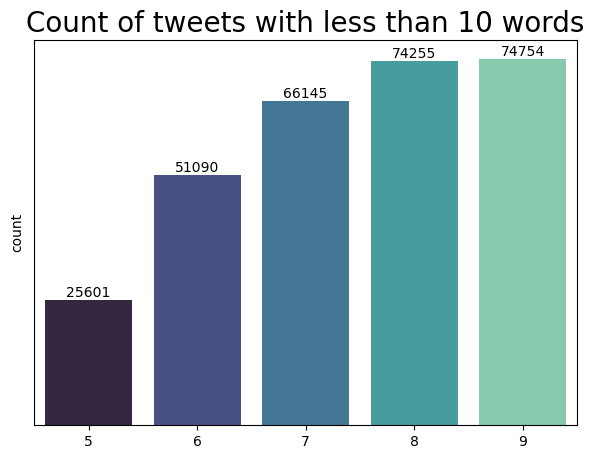

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

text_len = []
for text in df.title:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    
df['text_len'] = text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [30]:
df = df[df['text_len'] > 4] # Removing Texts with length less than 4

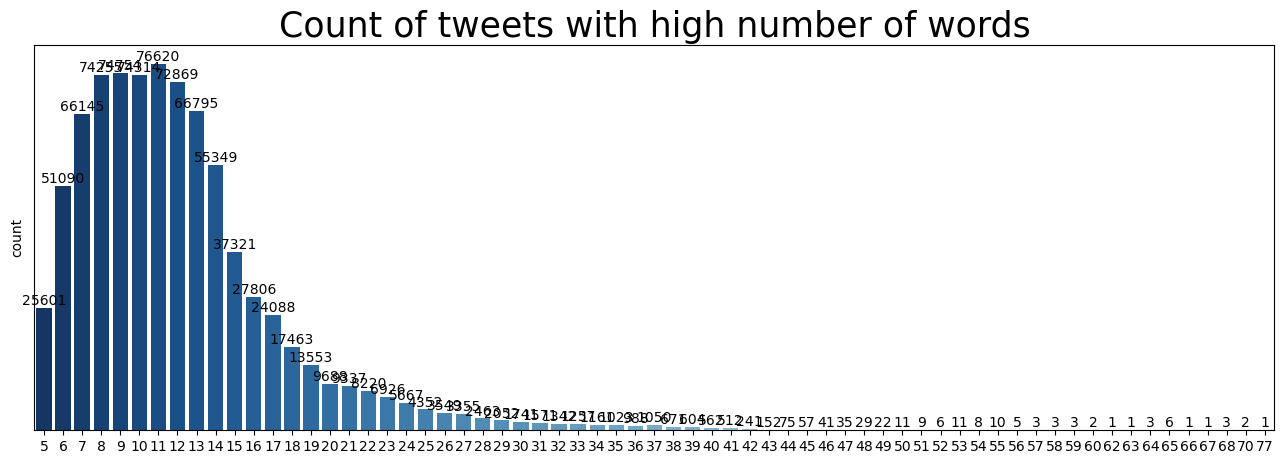

In [31]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>4)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [32]:
df = df[df['text_len'] <= 40] # Removing Texts with length greater than 40

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825602 entries, 0 to 1400468
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   stock     825602 non-null  object
 1   title     825602 non-null  object
 2   text_len  825602 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ MB


## BERT Zero Shot

In [34]:
tokenizer = AutoTokenizer.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
model = AutoModel.from_pretrained('mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
labels = ['neutral', 'positive', 'negative']

def bert_zero_shot(sentence):
    inputs = tokenizer.batch_encode_plus([sentence] + labels,
                                     return_tensors='pt',
                                     pad_to_max_length=True)
    
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    output = model(input_ids, attention_mask=attention_mask)[0]
    sentence_rep = output[:1].mean(dim=1)
    label_reps = output[1:].mean(dim=1)
    
    similarities = F.cosine_similarity(sentence_rep, label_reps)
    closest = similarities.argsort(descending=True)
    
    return labels[closest[0]]

Some weights of the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis were not used when initializing RobertaModel: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a dow

In [35]:
%%time
df['emotion'] = df['title'].apply(lambda cw : bert_zero_shot(cw))

/Users/bhanuprasanna/anaconda3/envs/data_science/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2263: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


KeyboardInterrupt: 

In [92]:
df.head()

,stock,title,emotion
0,a,stock that hit 52week high on friday,positive
1,a,stock that hit 52week high on wednesday,positive
2,a,71 biggest mover from friday,neutral
3,a,46 stock moving in friday midday session,negative
4,a,b of a security maintains neutral on agilent technology raise price target to 88,positive


## BERT Tokenizer

### Using prajjwal1/bert-mini

In [156]:
# Import generic wrappers
from transformers import AutoModel, AutoTokenizer 


# Define the model repo
model_name = "prajjwal1/bert-mini" 


# Download pytorch model
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Transform input tokens 
inputs = tokenizer("Hello world!", return_tensors="pt",  padding='max_length', truncation=True, max_length=50)

# Model apply
outputs = model(**inputs)

In [157]:
outputs['pooler_output'].shape

torch.Size([1, 256])

In [141]:
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

In [142]:
outputs = model(input_ids, attention_mask=attention_mask)

In [144]:
inputs

{'input_ids': tensor([[ 101, 7592, 2088,  999,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

### Using bert-base-uncased

In [145]:
# Import generic wrappers
from transformers import AutoModel, AutoTokenizer 


# Define the model repo
model_name = "bert-base-uncased" 


# Download pytorch model
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


# Transform input tokens 
inputs = tokenizer("Hello world!", return_tensors="pt",  padding='max_length', truncation=True, max_length=50)

# Model apply
outputs = model(**inputs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [152]:
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

outputs = model(input_ids, attention_mask=attention_mask)

In [154]:
outputs['pooler_output'].shape

torch.Size([1, 768])